<br>
<u>Notebook Nine</u> | 
<a href=https://leone.gdn/NLP target=_blank>Report</a> | 
<a href=https://github.com/andrealeone/NLP target=_blank>Repository</a>
<br><br>
<b>Feed-Forward Neural Network</b><br><br>
Andrea Leone<br>
ML for NLP — University of Trento<br>
January 2022
<hr><br><br>

In [1]:
import project 

import numpy as np
import torch

project.notebook()

In [2]:
records = project.sql_query(""" 
    SELECT vector, category FROM talks
    WHERE  vector IS NOT NULL
    ORDER BY slug ASC;
""")

(x, y), (z, t)                       \
    = train_set, test_set            \
    = splits                         \
    = project.split_in_sets( records )

project.describe_sets(splits)

train_set  =>  (0, 1376) (1, 1572) (2, 1052) 
test_set   =>  (0,  243) (1,  275) (2,  192) 


<br/>

### Feed-Forward Neural Network in PyTorch

Network(
  (fc1): Linear(in_features=300, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
  (fc5): Linear(in_features=10, out_features=3, bias=True)
)
AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0.01
)
CrossEntropyLoss()

TRAINING


  0%|          | 0/4000 [00:00<?, ?it/s]

loss 1000:  1.069
loss 2000:  0.921
loss 3000:  0.785
loss 4000:  0.762


  0%|          | 0/4000 [00:00<?, ?it/s]

loss 1000:  0.712
loss 2000:  0.696
loss 3000:  0.695
loss 4000:  0.692


  0%|          | 0/4000 [00:00<?, ?it/s]

loss 1000:  0.656
loss 2000:  0.645
loss 3000:  0.673
loss 4000:  0.662


  0%|          | 0/4000 [00:00<?, ?it/s]

loss 1000:  0.638
loss 2000:  0.622
loss 3000:  0.655
loss 4000:  0.652


  0%|          | 0/4000 [00:00<?, ?it/s]

loss 1000:  0.626
loss 2000:  0.608
loss 3000:  0.646
loss 4000:  0.634


  0%|          | 0/4000 [00:00<?, ?it/s]

loss 1000:  0.617
loss 2000:  0.594
loss 3000:  0.640
loss 4000:  0.622


  0%|          | 0/4000 [00:00<?, ?it/s]

loss 1000:  0.611
loss 2000:  0.590
loss 3000:  0.629
loss 4000:  0.612


  0%|          | 0/4000 [00:00<?, ?it/s]

loss 1000:  0.602
loss 2000:  0.586
loss 3000:  0.627
loss 4000:  0.604


  0%|          | 0/4000 [00:00<?, ?it/s]

loss 1000:  0.595
loss 2000:  0.574
loss 3000:  0.614
loss 4000:  0.598


  0%|          | 0/4000 [00:00<?, ?it/s]

loss 1000:  0.586
loss 2000:  0.574
loss 3000:  0.609
loss 4000:  0.587

TESTING


  0%|          | 0/710 [00:00<?, ?it/s]

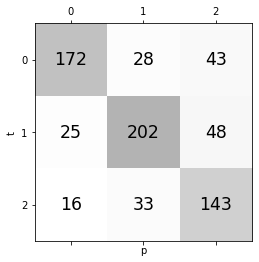

accuracy    0.7281690140845071
precision   0.7288945615674048
recall      0.7290520170844245


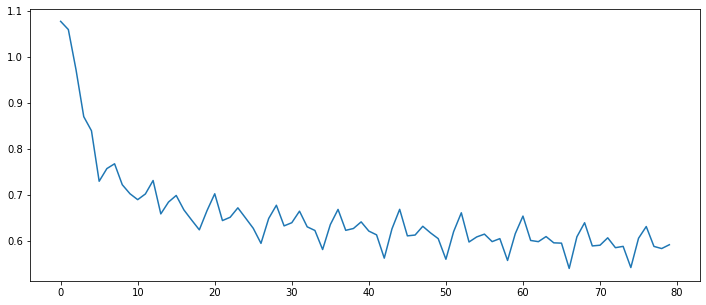

In [3]:
class Network(torch.nn.Module): 
    
    def __init__(self):
        super().__init__()
        
        self.fc1  = torch.nn.Linear( 300, 200 )
        self.fc2  = torch.nn.Linear( 200, 100 )
        self.fc3  = torch.nn.Linear( 100,  50 )
        self.fc4  = torch.nn.Linear(  50,  10 )
        self.fc5  = torch.nn.Linear(  10,   3 )
    
    def forward(self, x):
        
        x = x.reshape(x.shape[0], -1)

        x = torch.nn.functional.relu( self.fc1(x) )
        x = torch.nn.functional.relu( self.fc2(x) )
        x = torch.nn.functional.relu( self.fc3(x) )
        x = torch.nn.functional.relu( self.fc4(x) )
        x = torch.nn.functional.relu( self.fc5(x) )
        
        return x

model = Network()
print(model)

criterion = torch.nn.CrossEntropyLoss(
    weight=project.class_weights(y, as_type='tensor')
)

optimizer = torch.optim.AdamW (
    model.parameters(),
    lr=.001, eps=1e-08, weight_decay=.01
)

performance = project.train_nn ( model, x, y, criterion,optimizer, epochs=10, li=1000 )
results     = project.test_nn  ( model, z, t )

t, p, (accuracy,precision,recall), rl = results
project.plot_train(performance)

<b>Fine tuning score board</b> — FFNN<br> 
<pre>
accuracy  precision recall     cm_d         opt    ot   fc_s             es  o_ps     afs

.70422535 .71778046 .69910104  143 223 134  AdamW   /   100  50  3        5  lr=.001  relu
.74366197 .74462098 .73149605  176 231 121  AdamW   /   100  50  3       10  lr=.001  relu
.71690140 .71259160 .70573131  172 220 117  AdamW   /   100  50  3       15  lr=.001  relu
.73098591 .72506101 .72097557  185 215 119  AdamW   /   100  50  3        5  lr=.001  gelu
.73239436 .72760718 .72109458  188 216 116  AdamW   /   100  50  3       10  lr=.001  gelu
.73239436 .72809261 .72339529  186 213 121  AdamW   /   100  50  3       15  lr=.001  gelu
.72394366 .72099120 .72475628  181 194 139  AdamW   /   100  50  3        5  lr=.001  tanh
.72394366 .72102821 .72509976  193 185 136  AdamW   /   100  50  3       10  lr=.001  tanh
.72816901 .72196295 .72203875  197 198 122  AdamW   /   100  50  3       15  lr=.001  tanh

.71267605 .70672317 .70104696  172 219 115  AdamW   /   200 100 50 10 3   2  lr=.001  gelu
.73239436 .73514107 .71769742  170 235 115  AdamW   /   200 100 50 10 3   4  lr=.001  gelu
.72957746 .72578571 .72210928  180 213 125  AdamW   /   200 100 50 10 3   6  lr=.001  gelu
.73098591 .72650338 .71803638  183 222 114  AdamW   /   200 100 50 10 3   8  lr=.001  gelu
.72535211 .72356368 .71844868  170 217 128  AdamW   /   200 100 50 10 3  10  lr=.001  gelu
.73521126 .73416027 .73060146  170 217 135  AdamW   /   200 100 50 10 3  15  lr=.001  gelu
.72816901 .72257897 .72137602  183 209 125  AdamW   /   200 100 50 10 3  20  lr=.001  gelu
.72676056 .73050604 .72551494  164 211 141  AdamW   /   200 100 50 10 3  25  lr=.001  gelu

.60634920 .43402997 .55468008  215 167   0  AdamW  LOF  200 100 50 10 3  10  lr=.001  relu
.72380952 .74413987 .69950558  202 179  75  AdamW  LOF  200 100 50 10 3  15  lr=.001  relu
.62380952 .74634029 .59336458  221 126  46  AdamW  LOF  200 100 50 10 3   5  lr=.001  gelu
.58253968 .68958977 .55505680  216 106  45  AdamW  LOF  200 100 50 10 3  10  lr=.001  gelu
.60476190 .75503580 .57046015  222 124  35  AdamW  LOF  200 100 50 10 3  15  lr=.001  gelu
.66031746 .70950818 .62125433  168 214  34  AdamW  LOF  200 100 50 10 3   5  lr=.001  tanh
.70158730 .71377457 .70376210  132 186 124  AdamW  LOF  200 100 50 10 3  10  lr=.001  tanh
.58253968 .72297925 .55945593  223  90  54  AdamW  LOF  200 100 50 10 3  10  lr=.001  tanh

.69436619 .68575762 .68467514  178 203 112  AdamW   /   200 100 50 10 3  10  lr=.001  tanh
.72112676 .71683019 .71201186  182 211 119  AdamW   /   150 100 20  3     5  lr=.001  tanh
.72253521 .72552228 .70504489  180 229 104  AdamW   /   150 100 20  3    10  lr=.001  tanh
.73098591 .72572215 .71851524  186 219 114  AdamW   /   150 100 20  3    15  lr=.001  tanh

.62253521 .41762818 .56991644  214 228   0  Adam    /   150 100 20  3    10  lr=.001  tanh
.62253521 .41712290 .56959720  212 230  75  Adam    /   150 100 20  3    15  lr=.001  tanh

.62816901 .41884428 .57284948  202 244   0  Adagrad /   200 100 50 10 3  10  lr=.001  tanh
.60563380 .40754160 .55393440  205 225   0  Adagrad /   200 100 50 10 3  15  lr=.001  tanh

</pre>

<br/>